In [1]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# use `save_worspace(db)` to save variables at the end
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [5]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoder_weights_across_1sec_vhpc'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'linregress_residuals', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'load_all_animals_vars', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_cross_weights', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [7]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [8]:
all_animals  = np.loadtxt('../allmice.txt', dtype=str)
expo_animals = np.loadtxt('../expo_mice.txt', dtype=str)
pre_animals  = np.loadtxt('../pre_mice.txt', dtype=str)
d2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
post_animals = np.loadtxt('../post_mice.txt', dtype=str)
renew_animals= np.loadtxt('../renew_mice.txt', dtype=str)
ext2_animals = np.loadtxt('../ext2_mice.txt', dtype=str)
ext1_animals = np.loadtxt('../ext1_mice.txt', dtype=str)

In [9]:
#find animals common to both sessions
expopre_animals = np.intersect1d(expo_animals, pre_animals)
expopost_animals = np.intersect1d(expo_animals, post_animals)
prepost_animals = np.intersect1d(pre_animals, post_animals)
preext1_animals = np.intersect1d(pre_animals, ext1_animals)
preext2_animals = np.intersect1d(pre_animals, ext2_animals)
prerenew_animals = np.intersect1d(pre_animals, renew_animals)
postext1_animals = np.intersect1d(post_animals, ext1_animals)
postext2_animals = np.intersect1d(post_animals, ext2_animals)
postrenew_animals = np.intersect1d(post_animals, renew_animals)
ext1ext2_animals = np.intersect1d(ext1_animals, ext2_animals)
ext1renew_animals = np.intersect1d(ext1_animals, renew_animals)
ext2renew_animals = np.intersect1d(ext2_animals, renew_animals)

In [10]:
#get patterns of CellReg'd cells
#expopre_patterns_expo_first30 = load_all_animals_vars('patterns_evs_expopre', expopre_animals, '', notebook='decoding_expoVSpre_30trials')          
#expopre_patterns_pre_first30 = load_all_animals_vars('patterns_evs_pre_first30', expopre_animals, '', notebook='decoding_expoVSpre_30trials')                                            
#expopre_labels_expo_first30 = load_all_animals_vars('labels_expo',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
#expopre_labels_pre_first30 = load_all_animals_vars('labels_pre_first30',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
prepost_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_post', prepost_animals, '', notebook='patterns_time_bins')             
prepost_patterns_post = load_all_animals_vars('patterns_evs_1s_post_pre', prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_pre = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_post = load_all_animals_vars('labels_post',prepost_animals, '', notebook='patterns_time_bins')
preext1_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext1', preext1_animals, '', notebook='patterns_time_bins')             
preext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_pre', preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_pre = load_all_animals_vars('labels_pre',preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_ext1 = load_all_animals_vars('labels_ext1',preext1_animals, '', notebook='patterns_time_bins')
preext2_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext2', preext2_animals, '', notebook='patterns_time_bins')             
preext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_pre', preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_pre = load_all_animals_vars('labels_pre',preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_ext2 = load_all_animals_vars('labels_ext2',preext2_animals, '', notebook='patterns_time_bins')
prerenew_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_renew', prerenew_animals, '', notebook='patterns_time_bins')             
prerenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_pre', prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_pre = load_all_animals_vars('labels_pre',prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_renew = load_all_animals_vars('labels_renew',prerenew_animals, '', notebook='patterns_time_bins')
postext1_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_post = load_all_animals_vars('labels_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_ext1 = load_all_animals_vars('labels_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext2_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext2',postext2_animals, '', notebook='patterns_time_bins')
postext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_post = load_all_animals_vars('labels_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_ext2 = load_all_animals_vars('labels_ext2',postext2_animals, '', notebook='patterns_time_bins')
postrenew_patterns_post = load_all_animals_vars('patterns_evs_1s_post_renew',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_post = load_all_animals_vars('labels_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_renew = load_all_animals_vars('labels_renew',postrenew_animals, '', notebook='patterns_time_bins')
ext1ext2_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_ext2', ext1ext2_animals, '', notebook='patterns_time_bins')             
ext1ext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_ext1', ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext1 = load_all_animals_vars('labels_ext1',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext2 = load_all_animals_vars('labels_ext2',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1renew_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_renew', ext1renew_animals, '', notebook='patterns_time_bins')             
ext1renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext1', ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_ext1 = load_all_animals_vars('labels_ext1',ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_renew = load_all_animals_vars('labels_renew',ext1renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext2',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_renew = load_all_animals_vars('labels_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_ext2 = load_all_animals_vars('labels_ext2',ext2renew_animals, '', notebook='patterns_time_bins')


In [11]:
delta_t0 = 1

t_start0 = -5  # sec
t_stop0 = 11  # sec

In [12]:
all_comparisons = 'prepost_patterns_pre',\
'prepost_patterns_post',\
'preext1_patterns_pre',\
'preext1_patterns_ext1',\
'preext2_patterns_pre',\
'preext2_patterns_ext2',\
'prerenew_patterns_pre',\
'prerenew_patterns_renew',\
'postext1_patterns_post',\
'postext1_patterns_ext1',\
'postext2_patterns_post',\
'postext2_patterns_ext2',\
'postrenew_patterns_post',\
'postrenew_patterns_renew',\
'ext1ext2_patterns_ext1',\
'ext1ext2_patterns_ext2',\
'ext1renew_patterns_ext1',\
'ext1renew_patterns_renew',\
'ext2renew_patterns_renew',\
'ext2renew_patterns_ext2'

In [13]:
import collections
#ani_comparisons = 'expopre','expopost','prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'
for comp in all_comparisons:
    for t in range(16):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('_')[0]):
            try:
                print comp.split('_')[0],ani,t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue
        #now sort the dictionary so we have a standardized way of ordering dict data across notebooks!
        exec("%s_tb_%s = collections.OrderedDict(sorted(%s_tb_%s.items()))"%(comp,t,comp,t))

prepost 90 0 prepost 91 0 prepost 92 0 prepost 93 0 prepost c10m8 0 prepost c3f2 0 prepost c3f3 0 prepost c3m1 0 prepost c3m2 0 prepost c4m3 0 prepost c4m4 0 prepost 90 1 prepost 91 1 prepost 92 1 prepost 93 1 prepost c10m8 1 prepost c3f2 1 prepost c3f3 1 prepost c3m1 1 prepost c3m2 1 prepost c4m3 1 prepost c4m4 1 prepost 90 2 prepost 91 2 prepost 92 2 prepost 93 2 prepost c10m8 2 prepost c3f2 2 prepost c3f3 2 prepost c3m1 2 prepost c3m2 2 prepost c4m3 2 prepost c4m4 2 prepost 90 3 prepost 91 3 prepost 92 3 prepost 93 3 prepost c10m8 3 prepost c3f2 3 prepost c3f3 3 prepost c3m1 3 prepost c3m2 3 prepost c4m3 3 prepost c4m4 3 prepost 90 4 prepost 91 4 prepost 92 4 prepost 93 4 prepost c10m8 4 prepost c3f2 4 prepost c3f3 4 prepost c3m1 4 prepost c3m2 4 prepost c4m3 4 prepost c4m4 4 prepost 90 5 prepost 91 5 prepost 92 5 prepost 93 5 prepost c10m8 5 prepost c3f2 5 prepost c3f3 5 prepost c3m1 5 prepost c3m2 5 prepost c4m3 5 prepost c4m4 5 prepost 90 6 prepost 91 6 prepost 92 6 prepost 93 6 

In [14]:
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross_weights(patterns_t, labels_t, patterns_T, labels_T):

    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)

    decoder.fit(patterns_comb_train, labels_comb)
    weights_train = decoder.coef_[0]
    decoder.fit(patterns_comb_test, labels_comb)
    weights_test = decoder.coef_[0]
    return np.append(weights_train, weights_test)

In [15]:
%%time
#get decoder weights for each cell
n_loops=100
for t in range(16): # number of time bins
    exec('weights_%s = {}'%t)
    for comp in range(0,len(all_comparisons),2):
        print all_comparisons[comp].split('_')[0],t,
        exec("weights_%s[all_comparisons[comp].split('_')[0]] =\
             np.r_[[do_test_cross_weights(%s_tb_%s,%s_labels_%s,%s_tb_%s,%s_labels_%s) for i in range(n_loops)]]"%\
             (t,all_comparisons[comp],t,all_comparisons[comp].split('_')[0],all_comparisons[comp].split('_')[-1],
              all_comparisons[comp+1],t,all_comparisons[comp+1].split('_')[0],all_comparisons[comp+1].split('_')[-1]))

prepost 0 preext1 0 preext2 0 prerenew 0 postext1 0 postext2 0 postrenew 0 ext1ext2 0 ext1renew 0 ext2renew 0 prepost 1 preext1 1 preext2 1 prerenew 1 postext1 1 postext2 1 postrenew 1 ext1ext2 1 ext1renew 1 ext2renew 1 prepost 2 preext1 2 preext2 2 prerenew 2 postext1 2 postext2 2 postrenew 2 ext1ext2 2 ext1renew 2 ext2renew 2 prepost 3 preext1 3 preext2 3 prerenew 3 postext1 3 postext2 3 postrenew 3 ext1ext2 3 ext1renew 3 ext2renew 3 prepost 4 preext1 4 preext2 4 prerenew 4 postext1 4 postext2 4 postrenew 4 ext1ext2 4 ext1renew 4 ext2renew 4 prepost 5 preext1 5 preext2 5 prerenew 5 postext1 5 postext2 5 postrenew 5 ext1ext2 5 ext1renew 5 ext2renew 5 prepost 6 preext1 6 preext2 6 prerenew 6 postext1 6 postext2 6 postrenew 6 ext1ext2 6 ext1renew 6 ext2renew 6 prepost 7 preext1 7 preext2 7 prerenew 7 postext1 7 postext2 7 postrenew 7 ext1ext2 7 ext1renew 7 ext2renew 7 prepost 8 preext1 8 preext2 8 prerenew 8 postext1 8 postext2 8 postrenew 8 ext1ext2 8 ext1renew 8 ext2renew 8 prepost 9 

In [16]:
#get absolute values of weights
for t in range(16): # number of time bins
    exec("abs_weights_sess1_%s = {}"%t)
    exec("abs_weights_sess2_%s = {}"%t)
    for comp in range(0,len(all_comparisons),2):
        exec("abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]] = []"%t)
        exec("abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]] = []"%t)
        for x in eval("weights_%s[all_comparisons[comp].split('_')[0]]"%(t)):
            eval("abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]].append(abs(x[:(len(x)/2)]))"%(t)) #extract abs value of 1st half of data set (which corresponds to decoding weights for the first session) 
            eval("abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]].append(abs(x[(len(x)/2):]))"%(t)) #extract 2nd half, which corresponds to weights of 2nd session

In [17]:
%%time
#normalize abs weights by the total sum of weights for each loop
for tb in range(16):
    exec("sum_norm_abs_weights_sess1_%s = {}"%tb)
    exec("sum_norm_abs_weights_sess2_%s = {}"%tb)
    for comp in range(0,len(all_comparisons),2):
        exec("sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]]=[[]*1]*100"%tb) #initialize list of 100 lists (100 = n_loops from above)
        exec("sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]]=[[]*1]*100"%tb) #initialize list of 100 lists (100 = n_loops from above)
        for x,y in zip(eval("abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]]"%tb),
                       range(len(eval("abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]]"%tb)))):
            exec("sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][y]=[]"%tb)
            for i in x:
                eval("sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][y]"%tb).append\
                (float(i)/sum(np.array(eval("abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][y]"%tb))))
        for x,y in zip(eval("abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]]"%tb),
                       range(len(eval("abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]]"%tb)))):
            exec("sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][y]=[]"%tb)
            for i in x:
                eval("sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][y]"%tb).append\
                (float(i)/sum(np.array(eval("abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][y]"%tb))))
        print all_comparisons[comp].split('_')[0],tb,

prepost 0 preext1 0 preext2 0 prerenew 0 postext1 0 postext2 0 postrenew 0 ext1ext2 0 ext1renew 0 ext2renew 0 prepost 1 preext1 1 preext2 1 prerenew 1 postext1 1 postext2 1 postrenew 1 ext1ext2 1 ext1renew 1 ext2renew 1 prepost 2 preext1 2 preext2 2 prerenew 2 postext1 2 postext2 2 postrenew 2 ext1ext2 2 ext1renew 2 ext2renew 2 prepost 3 preext1 3 preext2 3 prerenew 3 postext1 3 postext2 3 postrenew 3 ext1ext2 3 ext1renew 3 ext2renew 3 prepost 4 preext1 4 preext2 4 prerenew 4 postext1 4 postext2 4 postrenew 4 ext1ext2 4 ext1renew 4 ext2renew 4 prepost 5 preext1 5 preext2 5 prerenew 5 postext1 5 postext2 5 postrenew 5 ext1ext2 5 ext1renew 5 ext2renew 5 prepost 6 preext1 6 preext2 6 prerenew 6 postext1 6 postext2 6 postrenew 6 ext1ext2 6 ext1renew 6 ext2renew 6 prepost 7 preext1 7 preext2 7 prerenew 7 postext1 7 postext2 7 postrenew 7 ext1ext2 7 ext1renew 7 ext2renew 7 prepost 8 preext1 8 preext2 8 prerenew 8 postext1 8 postext2 8 postrenew 8 ext1ext2 8 ext1renew 8 ext2renew 8 prepost 9 

In [18]:
for t in range(16): # number of time bins
    exec("avg_sum_norm_abs_weights_sess1_%s = {}"%t)
    exec("avg_sum_norm_abs_weights_sess2_%s = {}"%t)
    for comp in range(0,len(all_comparisons),2):
        exec("avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]] = [np.mean(k) \
        for k in zip(*sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]])]"%(t,t))
        exec("avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]] = [np.mean(k) \
        for k in zip(*sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]])]"%(t,t))

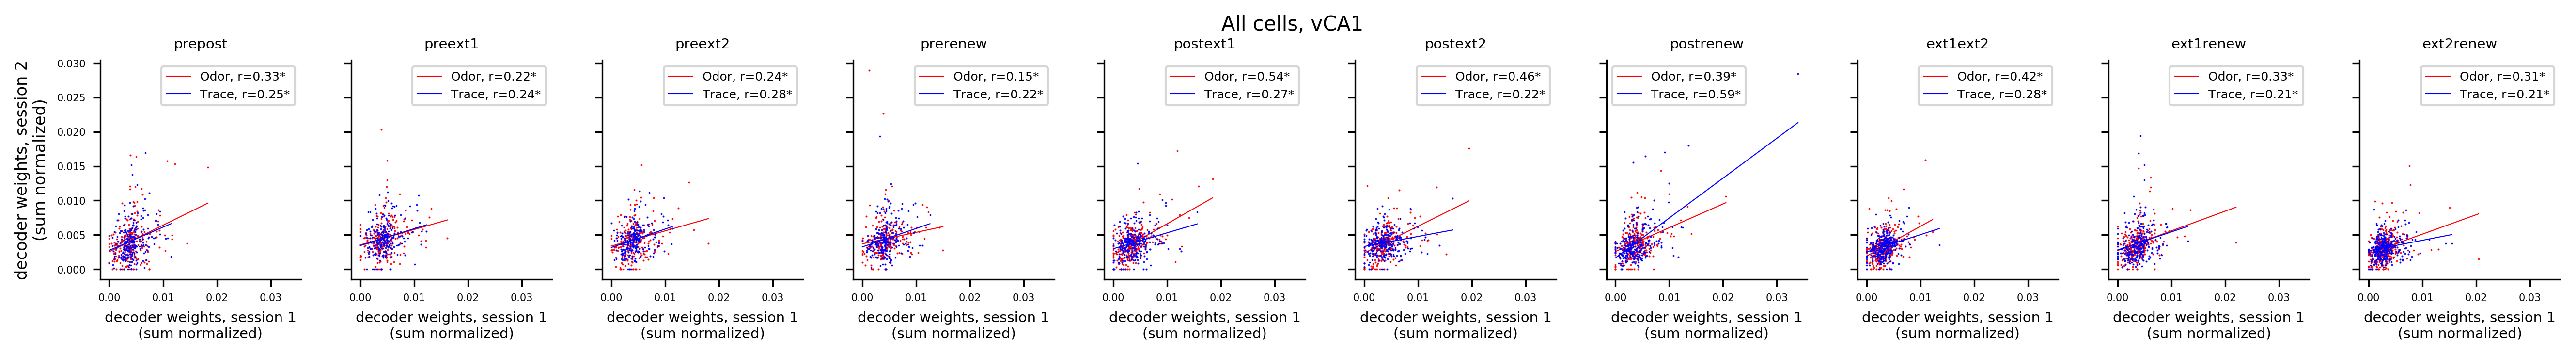

In [19]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for tb,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]]"%(tb))
        y = eval("avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]]"%(tb))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
    ax[i].set_title(all_comparisons[comp].split('_')[0])
    ax[i].legend(loc='best',prop={'size': 6})
    ax[0].set_ylabel("decoder weights, session 2\n(sum normalized)",fontsize=8)
    ax[i].set_xlabel("decoder weights, session 1\n(sum normalized)",fontsize=7)
pl.suptitle('All cells, vCA1',fontsize=10)


#pl.xlim(-.08,.08)
#pl.ylim(-.08,.08)
fig.tight_layout(pad=3)
#pl.savefig("../img/%s_weights_vs_weights_ALLcells.pdf"%NOTEBOOK_NAME)

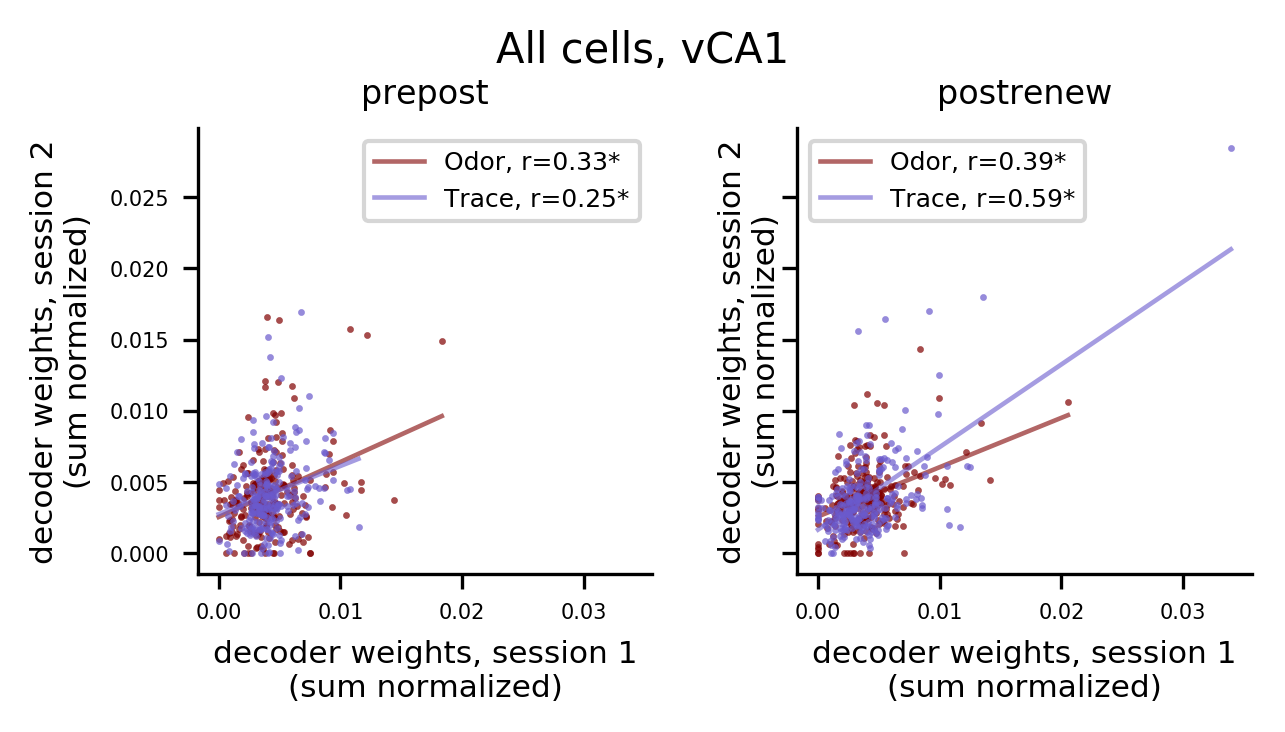

In [107]:
fig, ax = pl.subplots(1,2, figsize=(4.5, 2.5),sharex=True,sharey=True)
i=-1
compare=[['prepost_patterns_pre','prepost_patterns_post'],['postrenew_patterns_post','postrenew_patterns_renew']]
for comp in compare:
    i=i+1
    for t,lc,q,d in zip(('6','8'),('maroon','slateblue'),('o','o'),('Odor','Trace')):
        x = eval("avg_sum_norm_abs_weights_sess1_%s['%s']"%(t,comp[0].split('_')[0]))
        y = eval("avg_sum_norm_abs_weights_sess2_%s['%s']"%(t,comp[0].split('_')[0]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ''
            #lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,c=lc,markersize=1.5,alpha=0.7,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl,linewidth=1.1,alpha=.6)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(comp[0].split('_')[0],fontsize=8)
        ax[i].set_xlabel("decoder weights, session 1\n(sum normalized)",fontsize=7.5)
        ax[i].set_ylabel("decoder weights, session 2\n(sum normalized)",fontsize=7.5)
        #ax[i].text(0.77,0.95,('r={:.2f}'.format((r_value))+lbl),transform=ax[i].transAxes,fontsize=7,verticalalignment='top',
        #                bbox=dict(facecolor='none',edgecolor='black',boxstyle='round',linewidth=.5,pad=0.5))
pl.suptitle('All cells, vCA1',fontsize=10)

fig.tight_layout(pad=3)
#fig.savefig("../final-ish figures//%s_weights_vs_residuals.pdf"%NOTEBOOK_NAME)

In [20]:
reference_tbs = range(16)

In [54]:
#get data for venn diagram
no_cells=30 #take the top x # of weighted cells
for tb in reference_tbs:
    exec("top%s_sess1_%s={}"%(no_cells,tb))
    exec("top%s_sess2_%s={}"%(no_cells,tb))
    for comp in range(0,len(all_comparisons),2):
        exec("top%s_sess1_%s[all_comparisons[comp].split('_')[0]]=sorted(range(len(avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]])),\
             key=lambda i: avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][i],reverse=True)[:%s]"%(no_cells,tb,tb,tb,no_cells))
        exec("top%s_sess2_%s[all_comparisons[comp].split('_')[0]]=sorted(range(len(avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]])),\
             key=lambda i: avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][i],reverse=True)[:%s]"%(no_cells,tb,tb,tb,no_cells))

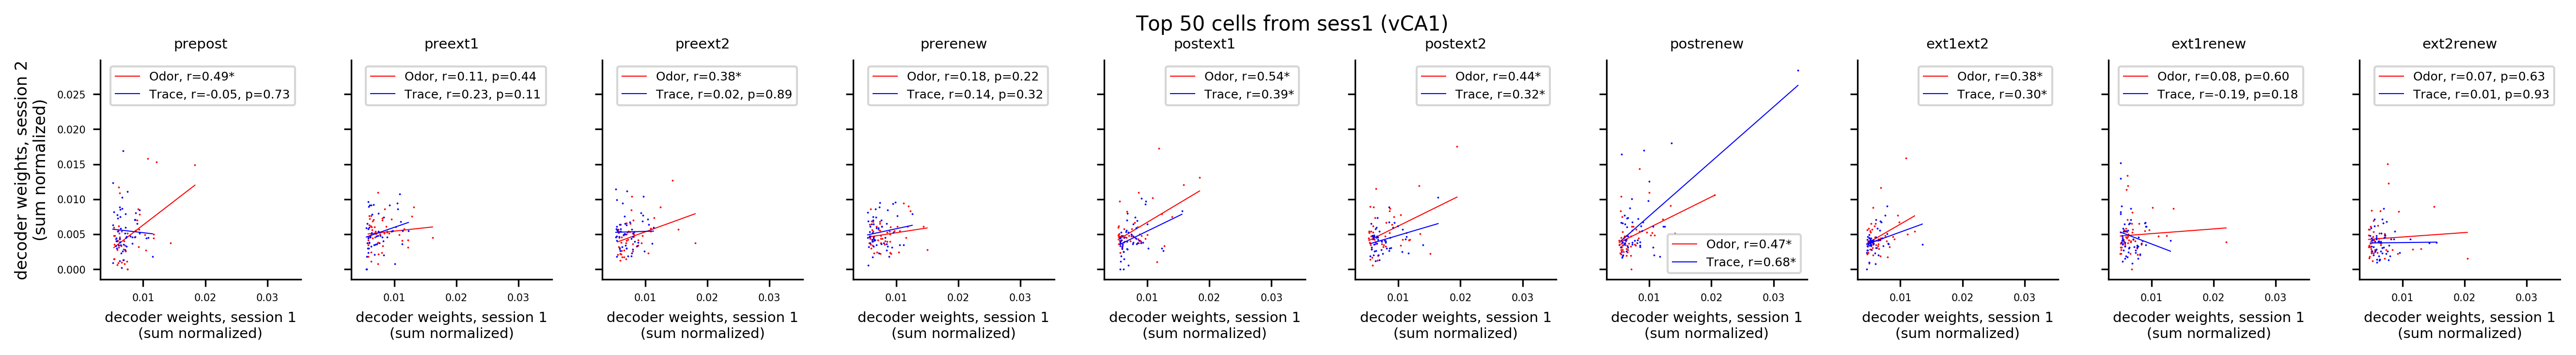

In [27]:
#scatter plot weights of the top n cells
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for tb,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("[avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][r] \
        for r in top%s_sess1_%s[all_comparisons[comp].split('_')[0]]]"%(tb,no_cells,tb))
        y = eval("[avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][r] \
        for r in top%s_sess1_%s[all_comparisons[comp].split('_')[0]]]"%(tb,no_cells,tb))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
    ax[i].set_title(all_comparisons[comp].split('_')[0])
    ax[i].legend(loc='best',prop={'size': 6})
    ax[0].set_ylabel("decoder weights, session 2\n(sum normalized)",fontsize=8)
    ax[i].set_xlabel("decoder weights, session 1\n(sum normalized)",fontsize=7)
pl.suptitle('All cells, dCA1',fontsize=10)

fig.tight_layout(pad=3)
#pl.savefig("../img/%s_weights_vs_weights_ALLcells.pdf"%NOTEBOOK_NAME)
pl.suptitle('Top '+str(no_cells)+' cells from sess1 (vCA1)',fontsize=10)


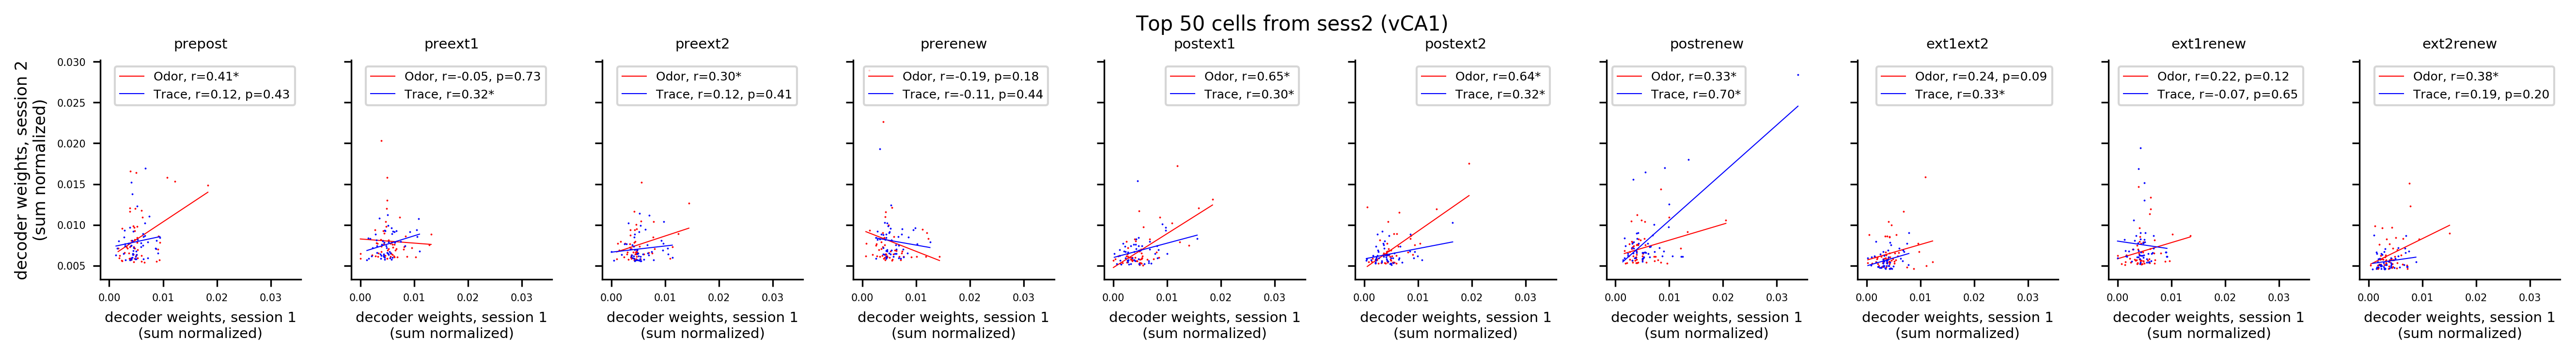

In [37]:
#scatter plot weights of the top n cells
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for tb,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("[avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][r] \
        for r in top%s_sess2_%s[all_comparisons[comp].split('_')[0]]]"%(tb,no_cells,tb))
        y = eval("[avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][r] \
        for r in top%s_sess2_%s[all_comparisons[comp].split('_')[0]]]"%(tb,no_cells,tb))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
    ax[i].set_title(all_comparisons[comp].split('_')[0])
    ax[i].legend(loc='best',prop={'size': 6})
    ax[0].set_ylabel("decoder weights, session 2\n(sum normalized)",fontsize=8)
    ax[i].set_xlabel("decoder weights, session 1\n(sum normalized)",fontsize=7)
pl.suptitle('All cells, dCA1',fontsize=10)

fig.tight_layout(pad=3)
#pl.savefig("../img/%s_weights_vs_weights_ALLcells.pdf"%NOTEBOOK_NAME)
pl.suptitle('Top '+str(no_cells)+' cells from sess2 (vCA1)',fontsize=10)


In [55]:
#determine how many top cells are common to sessions for each time bin
for tb in range(len(reference_tbs)):
    exec("tb_%s_sess_comp = {}"%(tb))
    for comp1,comp2 in zip(range(0,len(all_comparisons),2),range(1,len(all_comparisons),2)):
            exec("tb_%s_sess_comp[all_comparisons[comp1].split('_')[0]]=0"%(tb))
            for x in eval("top%s_sess1_%s"%(no_cells,tb))[all_comparisons[comp1].split('_')[0]]:
                if x in eval("top%s_sess2_%s"%(no_cells,tb))[all_comparisons[comp1].split('_')[0]]:
                    exec("tb_%s_sess_comp[all_comparisons[comp1].split('_')[0]] = tb_%s_sess_comp[all_comparisons[comp1].split('_')[0]] +1"%(tb,tb))
        #print 'tb_%svs%s[%s] = '%(tb,tb2,sess),

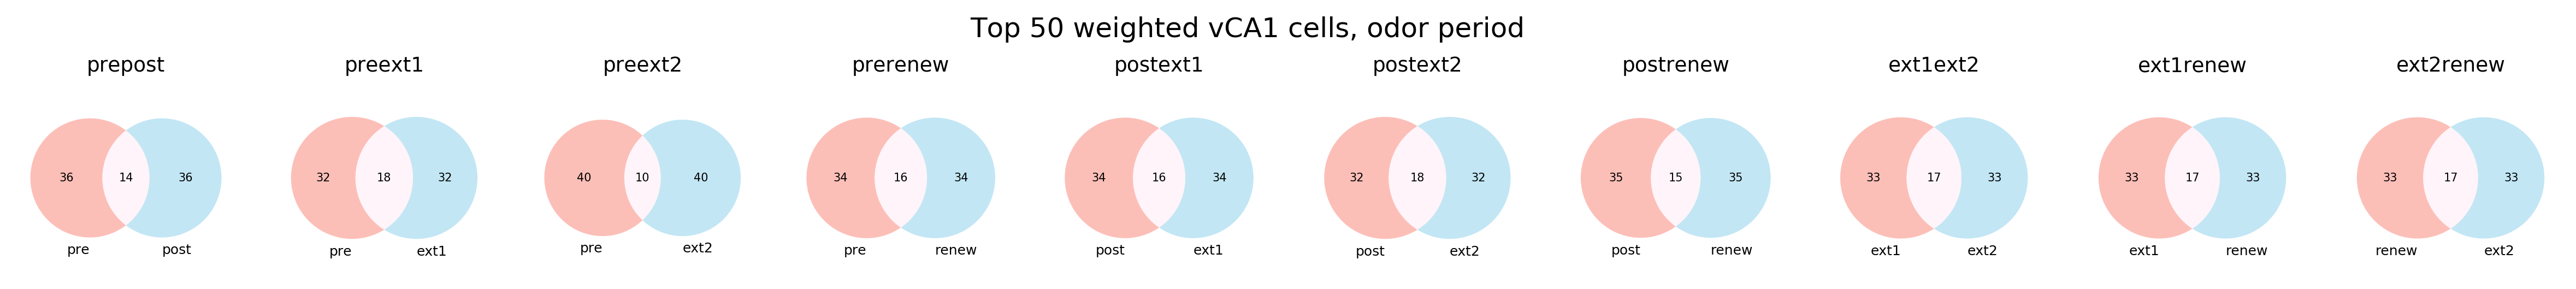

In [26]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=6
fig, axs = pl.subplots(1,len(all_comparisons)/2, figsize=(20, 1.5),sharex=True,sharey=True)

for x,comp in enumerate(range(0,len(all_comparisons),2)):
    s1_only= no_cells-eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=(all_comparisons[comp].split('_')[-1],
                    all_comparisons[comp+1].split('_')[-1]), set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(all_comparisons[comp].split('_')[0],fontsize=9)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, odor period'),fontsize=12,y=1.16)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

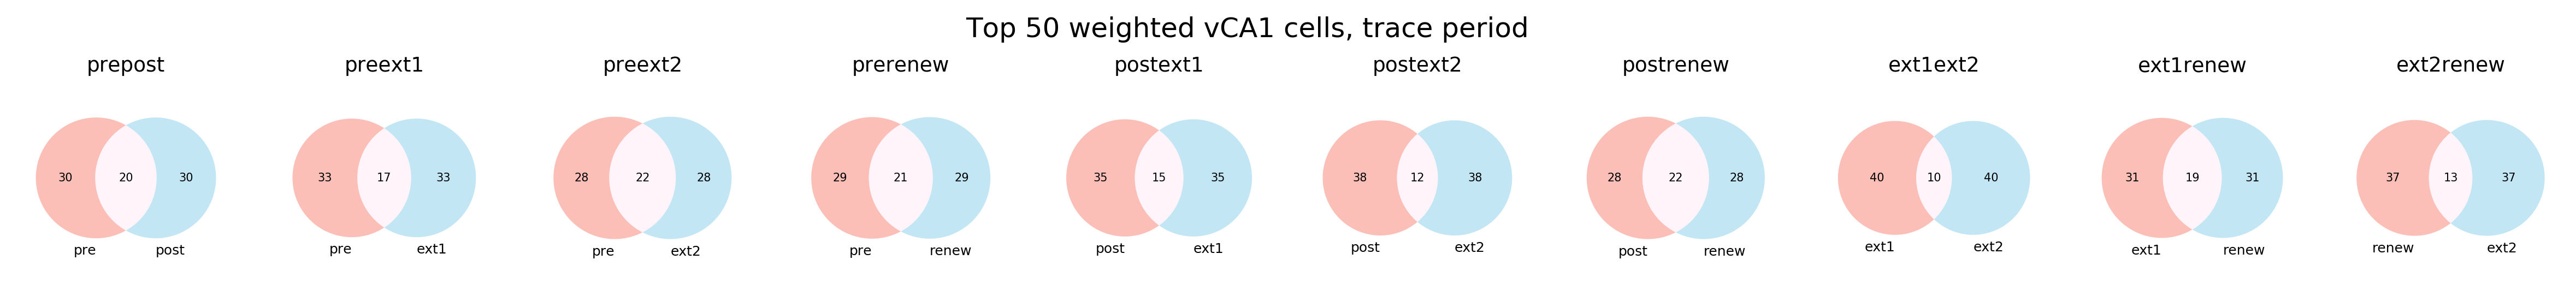

In [34]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=8
fig, axs = pl.subplots(1,len(all_comparisons)/2, figsize=(20, 1.5),sharex=True,sharey=True)

for x,comp in enumerate(range(0,len(all_comparisons),2)):
    s1_only= no_cells-eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=(all_comparisons[comp].split('_')[-1],
                    all_comparisons[comp+1].split('_')[-1]), set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(all_comparisons[comp].split('_')[0],fontsize=9)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, trace period'),fontsize=12,y=1.16)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

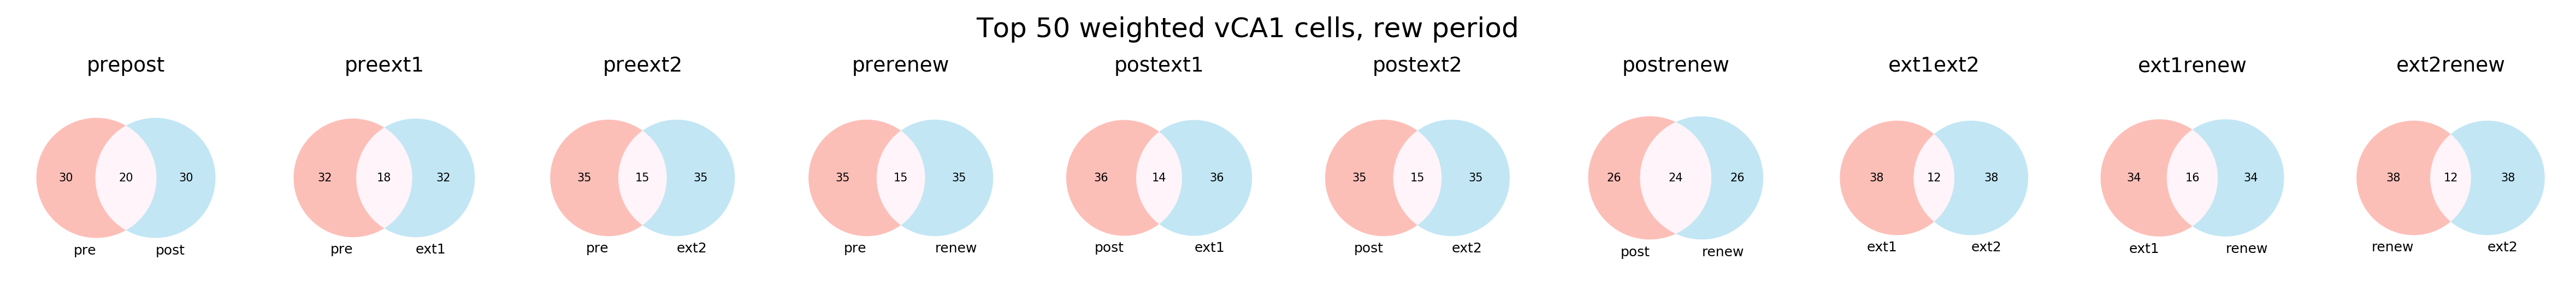

In [35]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=10
fig, axs = pl.subplots(1,len(all_comparisons)/2, figsize=(20, 1.5),sharex=True,sharey=True)

for x,comp in enumerate(range(0,len(all_comparisons),2)):
    s1_only= no_cells-eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=(all_comparisons[comp].split('_')[-1],
                    all_comparisons[comp+1].split('_')[-1]), set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(all_comparisons[comp].split('_')[0],fontsize=9)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, rew period'),fontsize=12,y=1.16)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

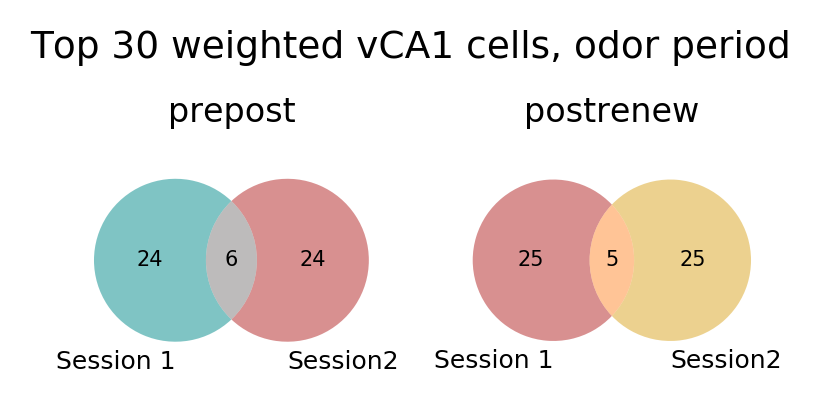

In [82]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=6
fig, axs = pl.subplots(1,2, figsize=(3, 1),sharex=True,sharey=True)

for x,comp,co in zip([0,1],['prepost','postrenew'],[['darkcyan','firebrick'],['firebrick','goldenrod']]):
    s1_only= no_cells-eval("tb_%s_sess_comp[comp]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[comp]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=('Session 1','Session2'),
                        set_colors=(co[0], co[-1]),alpha = 0.5,ax=axs[x])
    axs[x].set_title(comp,fontsize=8)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, odor period'),fontsize=9,y=1.27)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

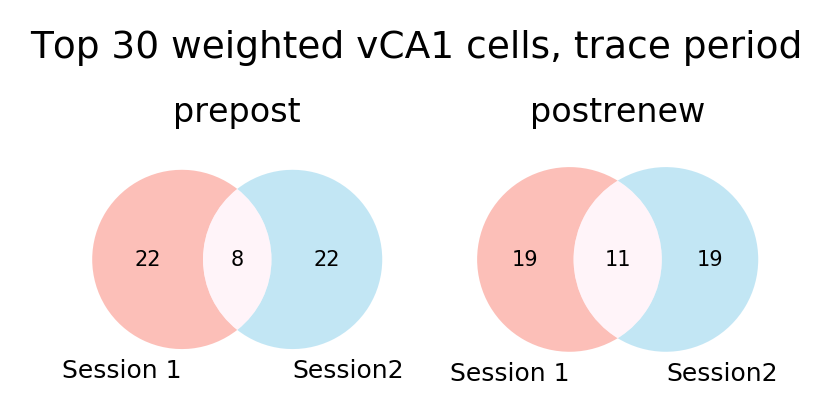

In [83]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=8
fig, axs = pl.subplots(1,2, figsize=(3, 1),sharex=True,sharey=True)

for x,comp in zip([0,1],['prepost','postrenew']):
    s1_only= no_cells-eval("tb_%s_sess_comp[comp]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[comp]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=('Session 1','Session2'),
                        set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(comp,fontsize=8)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, trace period'),fontsize=9,y=1.27)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

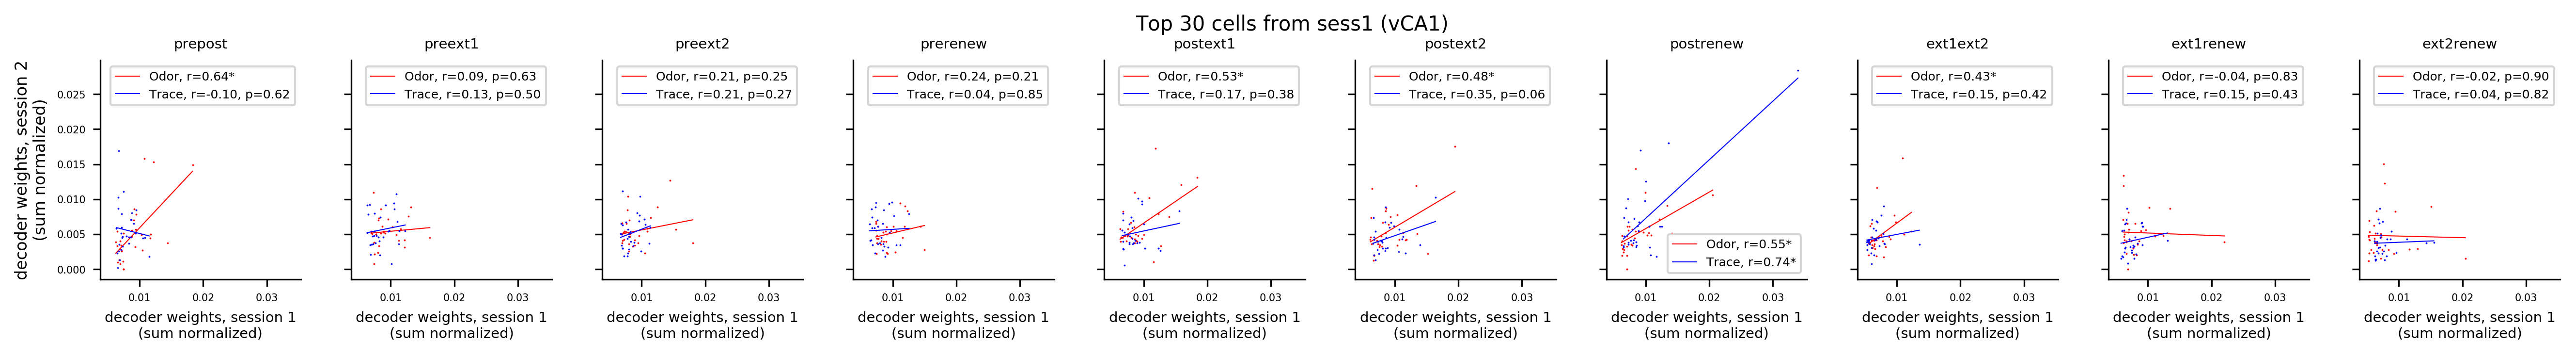

In [41]:
#scatter plot weights of the top n cells
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for tb,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("[avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]][r] \
        for r in top%s_sess1_%s[all_comparisons[comp].split('_')[0]]]"%(tb,no_cells,tb))
        y = eval("[avg_sum_norm_abs_weights_sess2_%s[all_comparisons[comp].split('_')[0]][r] \
        for r in top%s_sess1_%s[all_comparisons[comp].split('_')[0]]]"%(tb,no_cells,tb))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
    ax[i].set_title(all_comparisons[comp].split('_')[0])
    ax[i].legend(loc='best',prop={'size': 6})
    ax[0].set_ylabel("decoder weights, session 2\n(sum normalized)",fontsize=8)
    ax[i].set_xlabel("decoder weights, session 1\n(sum normalized)",fontsize=7)
pl.suptitle('All cells, dCA1',fontsize=10)

fig.tight_layout(pad=3)
#pl.savefig("../img/%s_weights_vs_weights_ALLcells.pdf"%NOTEBOOK_NAME)
pl.suptitle('Top '+str(no_cells)+' cells from sess1 (vCA1)',fontsize=10)


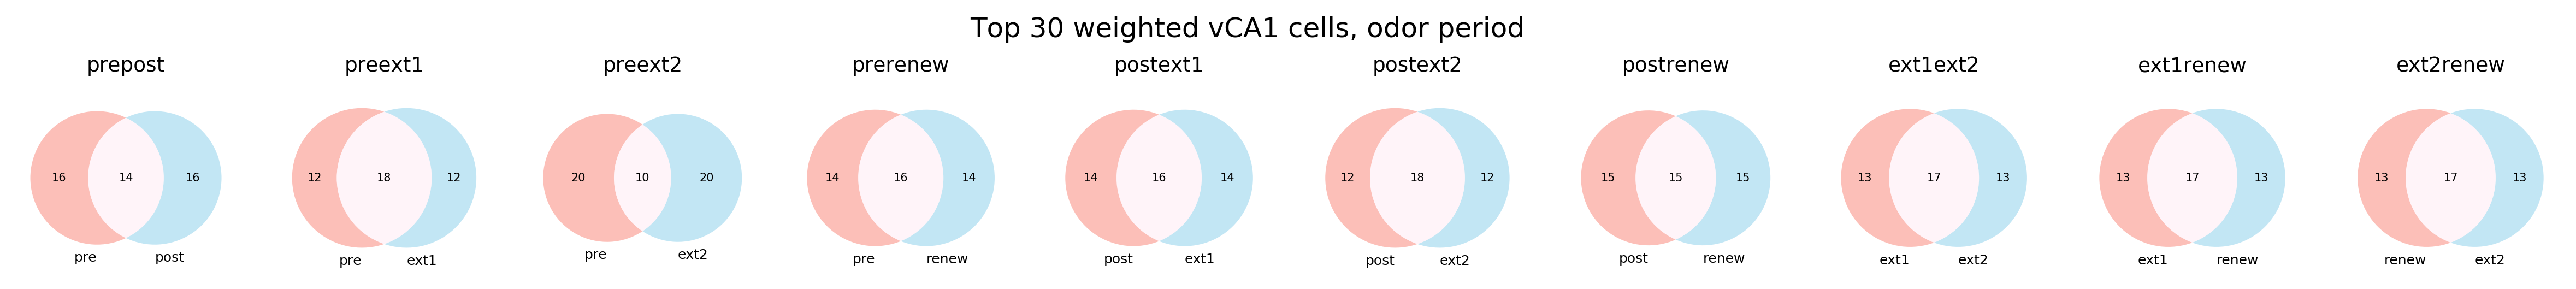

In [42]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=6
fig, axs = pl.subplots(1,len(all_comparisons)/2, figsize=(20, 1.5),sharex=True,sharey=True)

for x,comp in enumerate(range(0,len(all_comparisons),2)):
    s1_only= no_cells-eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=(all_comparisons[comp].split('_')[-1],
                    all_comparisons[comp+1].split('_')[-1]), set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(all_comparisons[comp].split('_')[0],fontsize=9)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, odor period'),fontsize=12,y=1.16)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

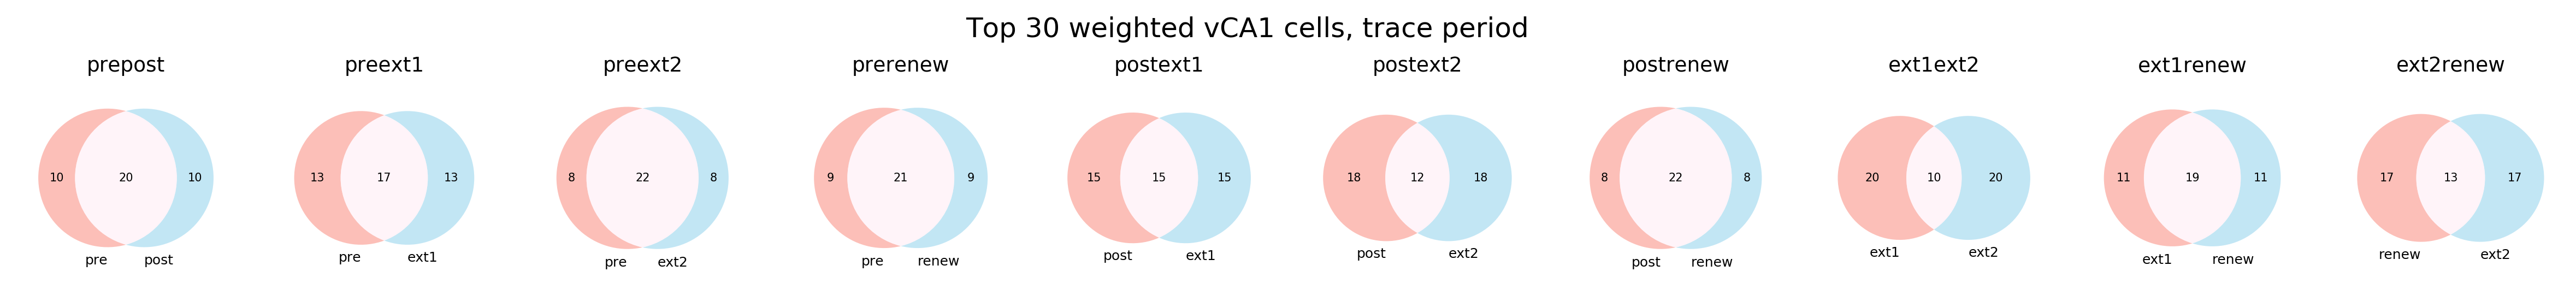

In [43]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=8
fig, axs = pl.subplots(1,len(all_comparisons)/2, figsize=(20, 1.5),sharex=True,sharey=True)

for x,comp in enumerate(range(0,len(all_comparisons),2)):
    s1_only= no_cells-eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[all_comparisons[comp].split('_')[0]]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=(all_comparisons[comp].split('_')[-1],
                    all_comparisons[comp+1].split('_')[-1]), set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(all_comparisons[comp].split('_')[0],fontsize=9)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, trace period'),fontsize=12,y=1.16)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

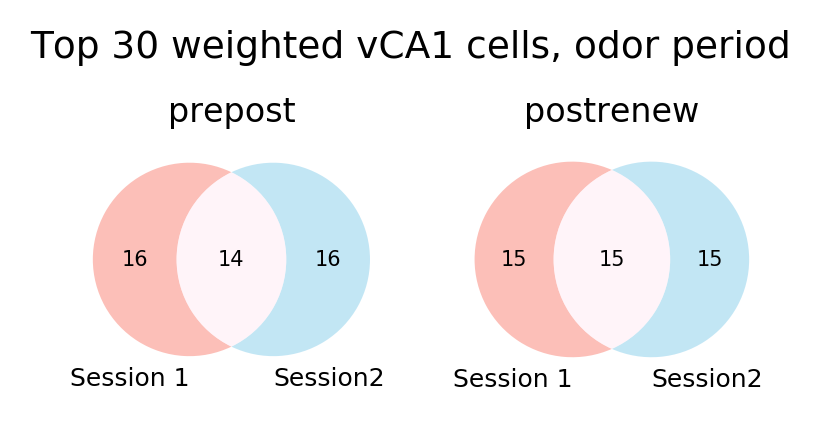

In [44]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=6
fig, axs = pl.subplots(1,2, figsize=(3, 1),sharex=True,sharey=True)

for x,comp in zip([0,1],['prepost','postrenew']):
    s1_only= no_cells-eval("tb_%s_sess_comp[comp]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[comp]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=('Session 1','Session2'),
                        set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(comp,fontsize=8)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, odor period'),fontsize=9,y=1.27)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

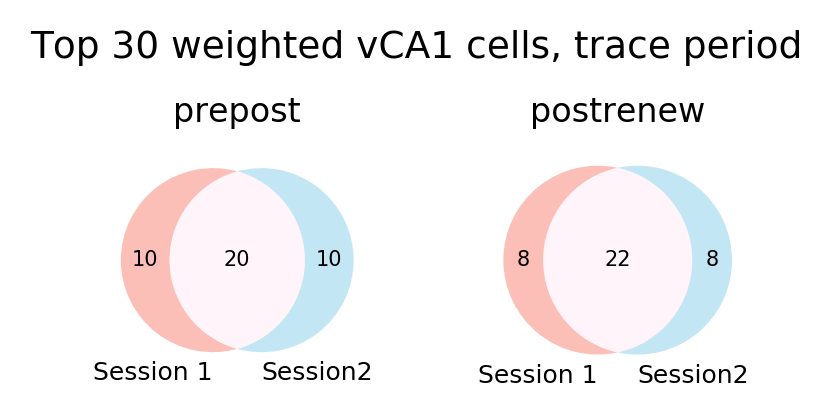

In [45]:
from matplotlib_venn import venn2
# Use the venn2 function
#venn2(subsets = (sess1 only,sess2 only,overlap), set_labels = ('Group A', 'Group B'))
tb=8
fig, axs = pl.subplots(1,2, figsize=(3, 1),sharex=True,sharey=True)

for x,comp in zip([0,1],['prepost','postrenew']):
    s1_only= no_cells-eval("tb_%s_sess_comp[comp]"%(tb))
    s1_s2= eval("tb_%s_sess_comp[comp]"%(tb))
    
    v=venn2(subsets=(s1_only,s1_only,s1_s2), set_labels=('Session 1','Session2'),
                        set_colors=('salmon', 'skyblue'),alpha = 0.5,ax=axs[x])
    axs[x].set_title(comp,fontsize=8)
    
pl.suptitle(('Top '+str(no_cells)+' weighted vCA1 cells, trace period'),fontsize=9,y=1.27)
#pl.savefig("../final-ish figures/%s_3venn.pdf"%NOTEBOOK_NAME)

### now activity vs weights

In [46]:
#patterns_tb... is dictionary of animal keys, so let's just make 1 inclusive list

In [56]:
#get average activity for each time bin
for t in range(16):
    for comp in all_comparisons:
        exec("dict_avg_patterns_tb_%s_%s={}"%(t,comp))
        for ani in eval("%s_animals"%(comp.split('_')[0])):
            exec("dict_avg_patterns_tb_%s_%s[ani] = [np.mean(k) for k in zip(*%s_tb_%s[ani])]"%(t,comp,comp,t))
            exec("dict_avg_patterns_tb_%s_%s = collections.OrderedDict(sorted(dict_avg_patterns_tb_%s_%s.items()))"%(t,comp,t,comp))

In [58]:
#extract values from dictionary keys to make 1 inclusive list
for t in range(16):
    for comp in all_comparisons:
        exec("avg_patterns_tb_%s_%s=[]"%(t,comp))
        for ani in eval("dict_avg_patterns_tb_%s_%s.keys()"%(t,comp)):
            for x in eval("dict_avg_patterns_tb_%s_%s[ani]"%(t,comp)):
                exec("avg_patterns_tb_%s_%s.append(x)"%(t,comp))

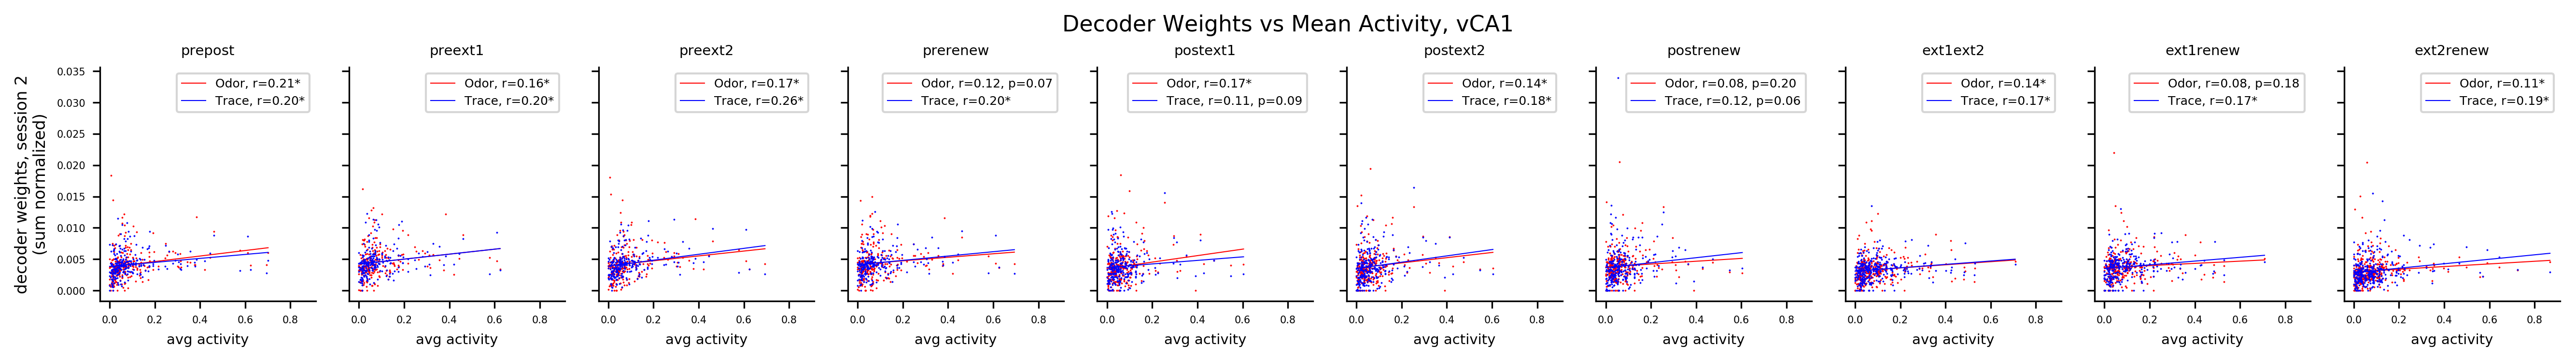

In [63]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for tb,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        y = eval("avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]]"%(tb))
        x = eval("avg_patterns_tb_%s_%s"%(t,all_comparisons[comp]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
    ax[i].set_title(all_comparisons[comp].split('_')[0])
    ax[i].legend(loc='best',prop={'size': 6})
    ax[0].set_ylabel("decoder weights, session 2\n(sum normalized)",fontsize=8)
    ax[i].set_xlabel("avg activity",fontsize=7)
pl.suptitle('Decoder Weights vs Mean Activity, vCA1',fontsize=11, y=1)


#pl.xlim(-.08,.08)
#pl.ylim(-.08,.08)
fig.tight_layout(pad=3)
#pl.savefig("../img/%s_weights_vs_weights_ALLcells.pdf"%NOTEBOOK_NAME)

In [60]:
#get average activity over all time bins
for comp in all_comparisons:
    exec("dict_avg_events_%s={}"%(comp))
    exec("events_%s={}"%(comp))
    for ani in eval("%s_animals"%(comp.split('_')[0])):
        exec("events_%s[ani] = []"%comp)
        #flatten list so that all time bins and trials are appended together for each cell
        for sublist in eval("%s[ani]"%comp):
            for item in sublist:
                exec("events_%s[ani].append(item)"%comp)
        exec("dict_avg_events_%s[ani]=[]"%(comp))
        exec("dict_avg_events_%s[ani] = [np.mean(k) for k in zip(*events_%s[ani])]"%(comp,comp))
        exec("dict_avg_events_%s = collections.OrderedDict(sorted(dict_avg_events_%s.items()))"%(comp,comp))

In [61]:
#extract values from dictionary keys to make 1 inclusive list
for t in range(16):
    for comp in all_comparisons:
        exec("avg_events_%s=[]"%(comp))
        for ani in eval("dict_avg_events_%s.keys()"%(comp)):
            for x in eval("dict_avg_events_%s[ani]"%(comp)):
                exec("avg_events_%s.append(x)"%(comp))

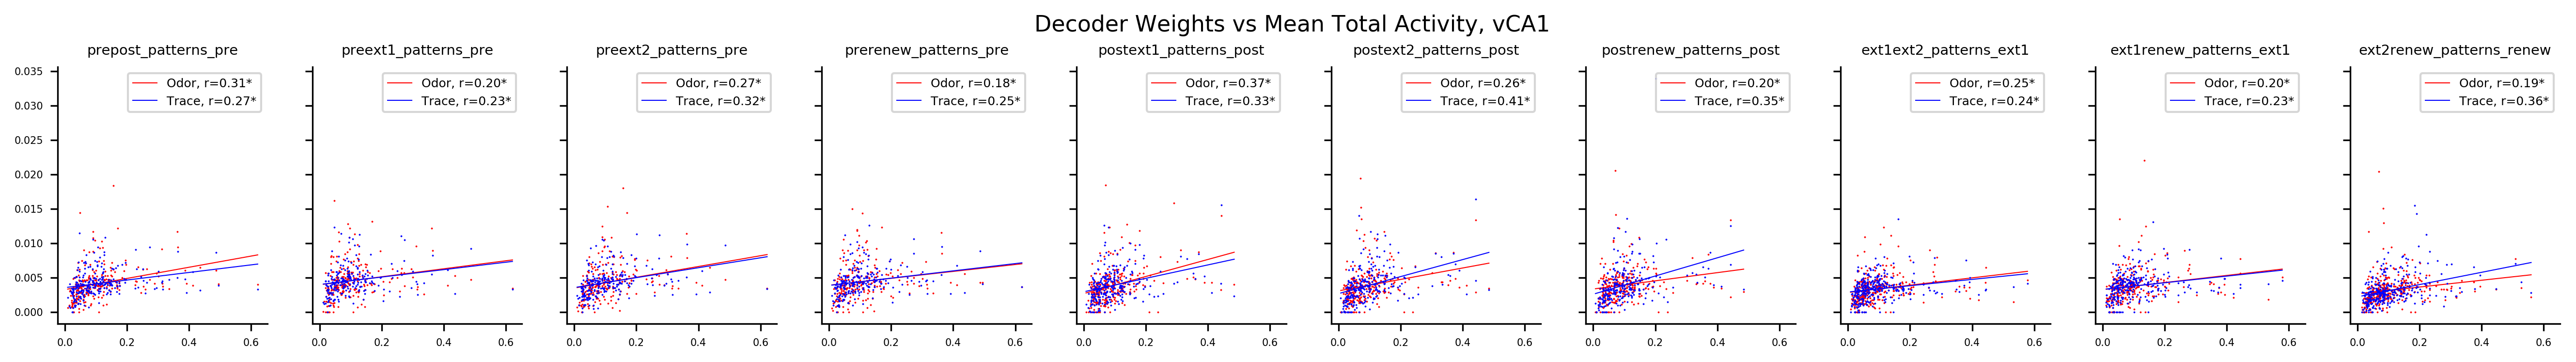

In [62]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for tb,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        y = eval("avg_sum_norm_abs_weights_sess1_%s[all_comparisons[comp].split('_')[0]]"%(tb))
        x = eval("avg_events_%s"%(all_comparisons[comp]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
    ax[i].set_title(all_comparisons[comp])
    
pl.suptitle('Decoder Weights vs Mean Total Activity, vCA1',fontsize=11, y=1)

fig.tight_layout(pad=3)

### now try plotting when taking log10 values (to expand the cluster around the origin)

In [64]:
import math
for tb in range(16):
    exec("avg_sum_norm_abs_weights_sess1_%s_log10 = {}"%tb)
    exec("avg_sum_norm_abs_weights_sess1_%s_log10_no0 = {}"%tb) #will exclude all 0 weighted cells (and also need to do same for activity data)
    exec("avg_sum_norm_abs_weights_sess2_%s_log10 = {}"%tb)
    exec("avg_sum_norm_abs_weights_sess2_%s_log10_no0 = {}"%tb)
for comp,i in zip(all_comparisons,[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]):
        for t in range(16):
                exec("avg_sum_norm_abs_weights_sess%s_%s_log10[comp.split('_')[0]] = []"%(i,t))
                exec("avg_sum_norm_abs_weights_sess%s_%s_log10_no0[comp.split('_')[0]] = []"%(i,t))
                exec("avg_events_%s_log10 = []"%(comp))
                exec("avg_events_tb_%s_%s_log10_no0 = []"%(t,comp))
                for x,y in zip(eval("avg_sum_norm_abs_weights_sess%s_%s[comp.split('_')[0]]"%(i,t)),eval("avg_events_%s"%(comp))):
                    if x == 0:
                        exec("avg_sum_norm_abs_weights_sess%s_%s_log10[comp.split('_')[0]].append(-4)"%(i,t))
                    else:
                        exec("avg_sum_norm_abs_weights_sess%s_%s_log10[comp.split('_')[0]].append(math.log10(x))"%(i,t))
                        exec("avg_sum_norm_abs_weights_sess%s_%s_log10_no0[comp.split('_')[0]].append(math.log10(x))"%(i,t))
                        exec("avg_events_tb_%s_%s_log10_no0.append(math.log10(y))"%(t,comp))         
        for x in eval("avg_events_%s"%(comp)):
                #if x == 0:
                #    exec("avg_events_%s_log10.append(-4)"%(sess))
                #else:
                    exec("avg_events_%s_log10.append(math.log10(x))"%(comp))

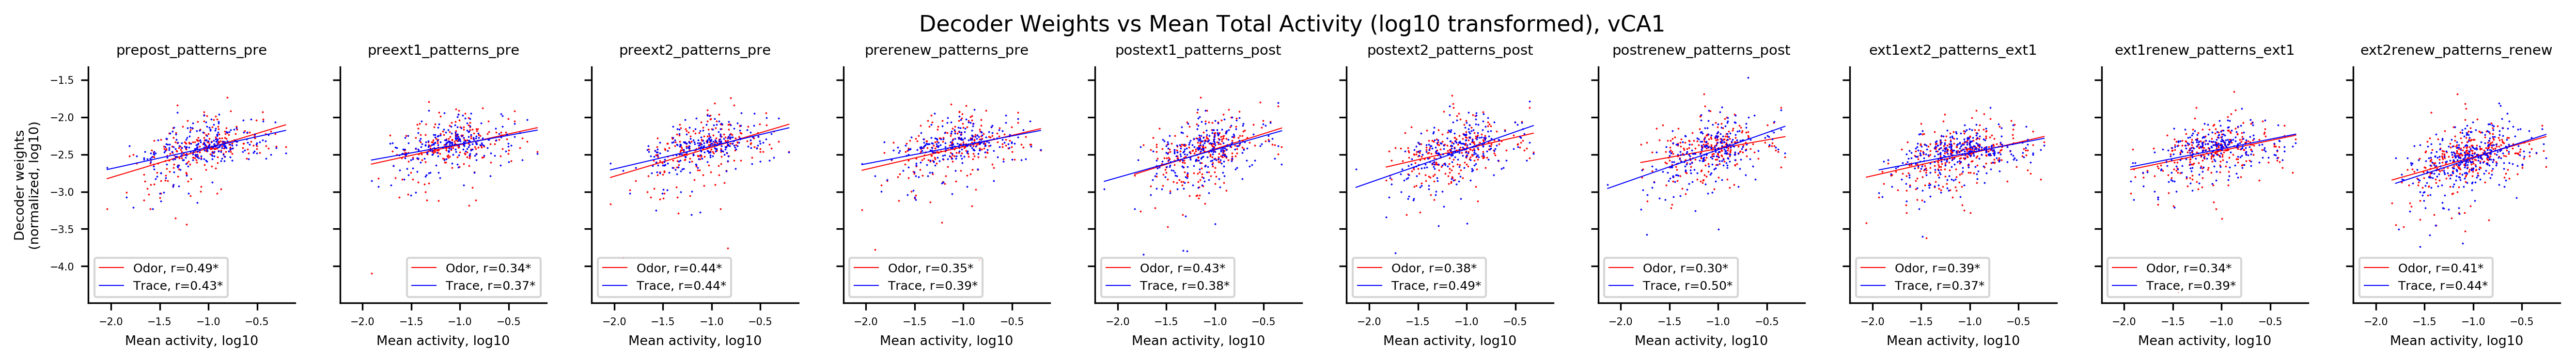

In [66]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for t,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        y = eval("avg_sum_norm_abs_weights_sess1_%s_log10_no0[all_comparisons[comp].split('_')[0]]"%t)
        x = eval("avg_events_tb_%s_%s_log10_no0"%(t,all_comparisons[comp]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_xlabel("Mean activity, log10",fontsize=6.5)
        ax[0].set_ylabel("Decoder weights\n(normalized, log10)",fontsize=6.5)
    ax[i].set_title(all_comparisons[comp])
pl.suptitle('Decoder Weights vs Mean Total Activity (log10 transformed), vCA1',fontsize=11, y=1)

fig.tight_layout(pad=3)

In [67]:
#extract 0 weighted cells that occur in either of the sessions we want to compare
for t in range(16):
    exec("avg_sum_norm_abs_weights_sess1VSsess2_%s_log10_no0s = {}"%(t))
    exec("avg_sum_norm_abs_weights_sess2VSsess1_%s_log10_no0s = {}"%(t))
    for comp in all_comparisons:
        exec("avg_sum_norm_abs_weights_sess1VSsess2_%s_log10_no0s[comp.split('_')[0]] = []"%(t))
        exec("avg_sum_norm_abs_weights_sess2VSsess1_%s_log10_no0s[comp.split('_')[0]] = []"%(t))
        for x,y in zip(eval("avg_sum_norm_abs_weights_sess1_%s[comp.split('_')[0]]"%t),
                       eval("avg_sum_norm_abs_weights_sess2_%s[comp.split('_')[0]]"%t)):
            if x == 0 or y == 0:
                print ".",
            else:
                exec("avg_sum_norm_abs_weights_sess1VSsess2_%s_log10_no0s[comp.split('_')[0]].append(math.log10(x))"%(t))
                exec("avg_sum_norm_abs_weights_sess2VSsess1_%s_log10_no0s[comp.split('_')[0]].append(math.log10(y))"%(t))

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

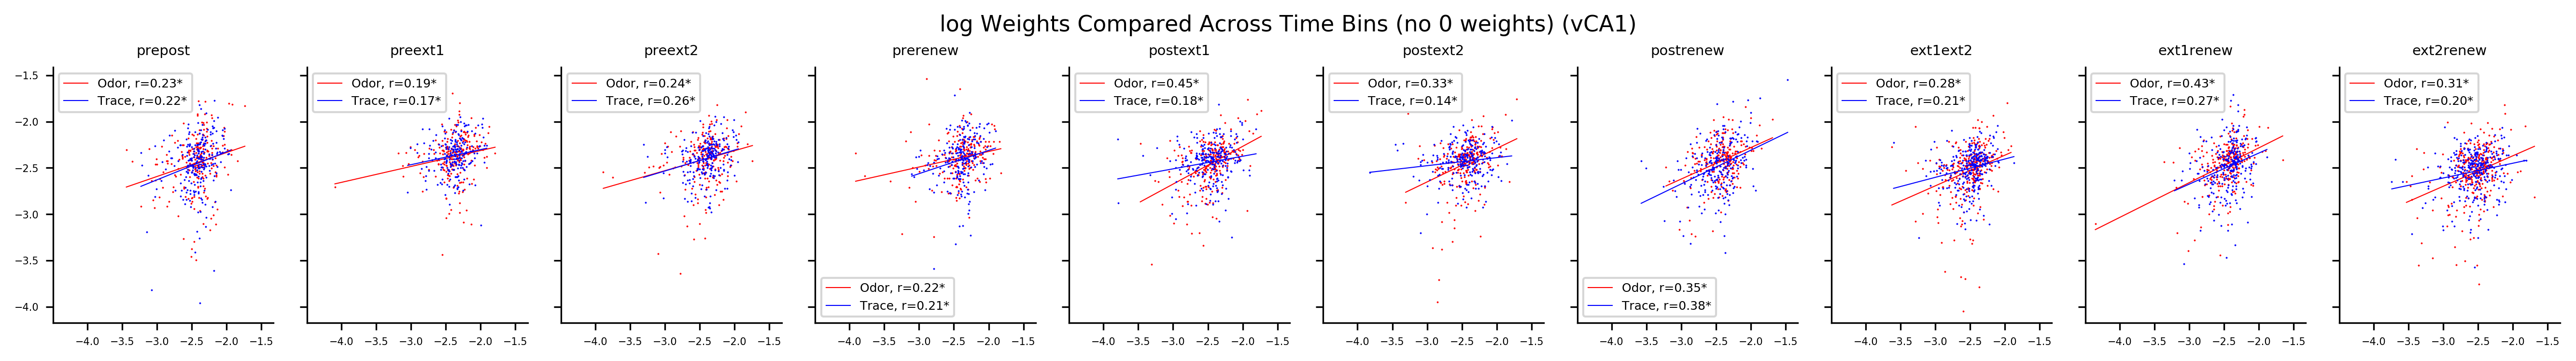

In [69]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for t,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("avg_sum_norm_abs_weights_sess1VSsess2_%s_log10_no0s[all_comparisons[comp].split('_')[0]]"%(t))
        y = eval("avg_sum_norm_abs_weights_sess2VSsess1_%s_log10_no0s[all_comparisons[comp].split('_')[0]]"%(t))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ', p={:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
    ax[i].set_title(all_comparisons[comp].split('_')[0])
pl.suptitle('log Weights Compared Across Time Bins (no 0 weights) (vCA1)',fontsize=11, y=1)

fig.tight_layout(pad=3)


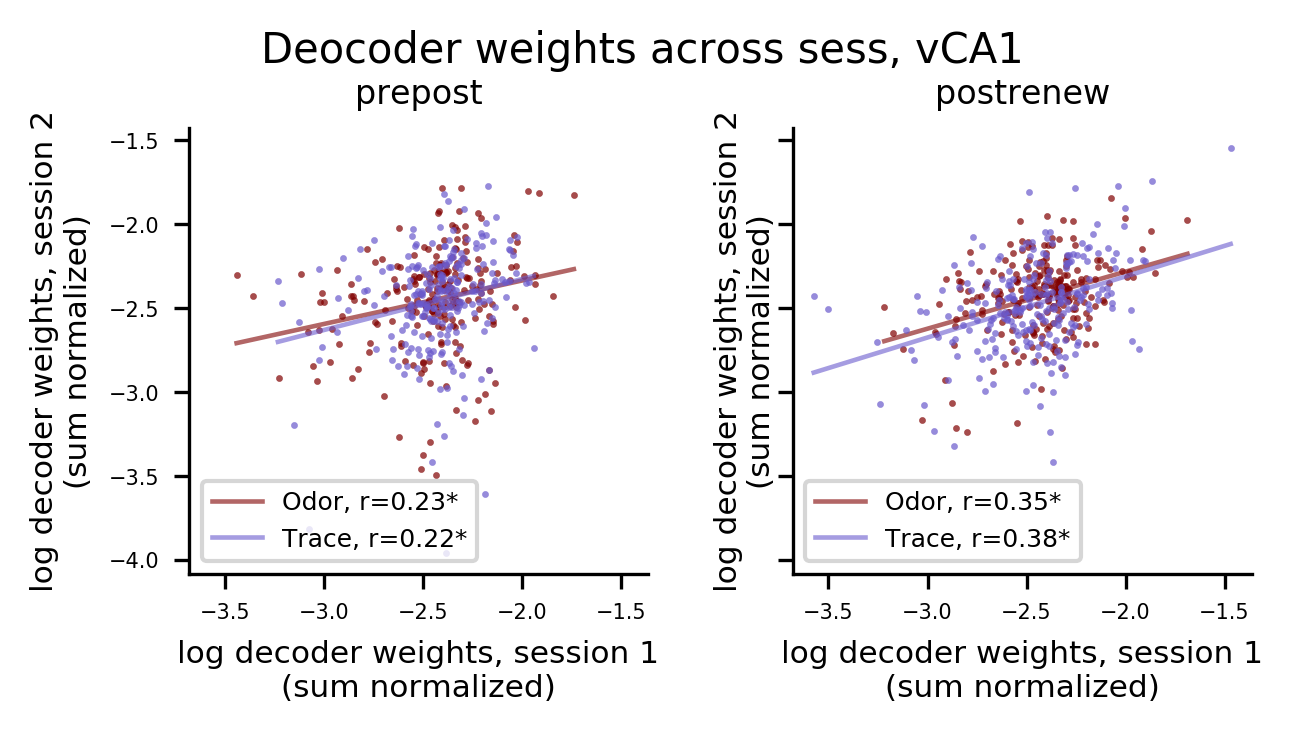

In [114]:
fig, ax = pl.subplots(1,2, figsize=(4.5, 2.5),sharex=True,sharey=True)
i=-1
compare=[['prepost_patterns_pre','prepost_patterns_post'],['postrenew_patterns_post','postrenew_patterns_renew']]
for comp in compare:
    i=i+1
    for t,lc,q,d in zip(('6','8'),('maroon','slateblue'),('o','o'),('Odor','Trace')):
        x = eval("avg_sum_norm_abs_weights_sess1VSsess2_%s_log10_no0s['%s']"%(t,comp[0].split('_')[0]))
        y = eval("avg_sum_norm_abs_weights_sess2VSsess1_%s_log10_no0s['%s']"%(t,comp[0].split('_')[0]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ''
            #lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,c=lc,markersize=1.5,alpha=0.7,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl,linewidth=1.1,alpha=.6)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(comp[0].split('_')[0],fontsize=8)
        ax[i].set_xlabel("log decoder weights, session 1\n(sum normalized)",fontsize=7.5)
        ax[i].set_ylabel("log decoder weights, session 2\n(sum normalized)",fontsize=7.5)
        #ax[i].text(0.77,0.95,('r={:.2f}'.format((r_value))+lbl),transform=ax[i].transAxes,fontsize=7,verticalalignment='top',
        #                bbox=dict(facecolor='none',edgecolor='black',boxstyle='round',linewidth=.5,pad=0.5))
pl.suptitle('Deocoder weights across sess, vCA1',fontsize=10)

fig.tight_layout(pad=3)
fig.savefig("../final-ish figures/%s_log_weights.pdf"%NOTEBOOK_NAME)

# regressing out activity (using avg activity over entire session, not a specific time bin)

In [7]:
def linregress_residuals(xdata,ydata):
    """
    This function performs a linear regression and then gets the residuals
    
    Args:
        xdata (array-like): The x data
        ydata (array-like): The y data
        
    Returns:
        residuals: the residuals of the regression
        slope: the slope of regression line
        intercept: intercept of the regression line
        rvalue: correlation coeffficient
        pvalue: two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.
        stderr: standard error of the estimated gradient
    
    Author: SMM
    """
    
    from scipy import stats
    
    # Get the regression
    (m,b,r,pvalue,stderr)=stats.linregress(xdata,ydata)   
    #print("In regress1, m is: "+str(m))    
    # get the residuals
    residuals = np.copy(xdata)
    for idx,x in enumerate(xdata):
        yfit = m*x+b
        residuals[idx] = yfit-ydata[idx]
        
    return (residuals,m,b,r,pvalue,stderr) 

In [71]:
#regress using avg activity over entire session, not a specific time bin
for comp,i in zip(all_comparisons,[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]):
    for t in range(16):
        y = eval("avg_sum_norm_abs_weights_sess%s_%s[comp.split('_')[0]]"%(i,t))
        x = eval("avg_events_%s"%(comp))
        exec("residuals_tb_%s_%s,m_tb_%s_%s,b_tb_%s_%s,r_tb_%s_%s,pvalue_tb_%s_%s,stderr_tb_%s_%s = linregress_residuals(x,y)"%(t,
              comp,t,comp,t,comp,t,comp,t,comp,t,comp))

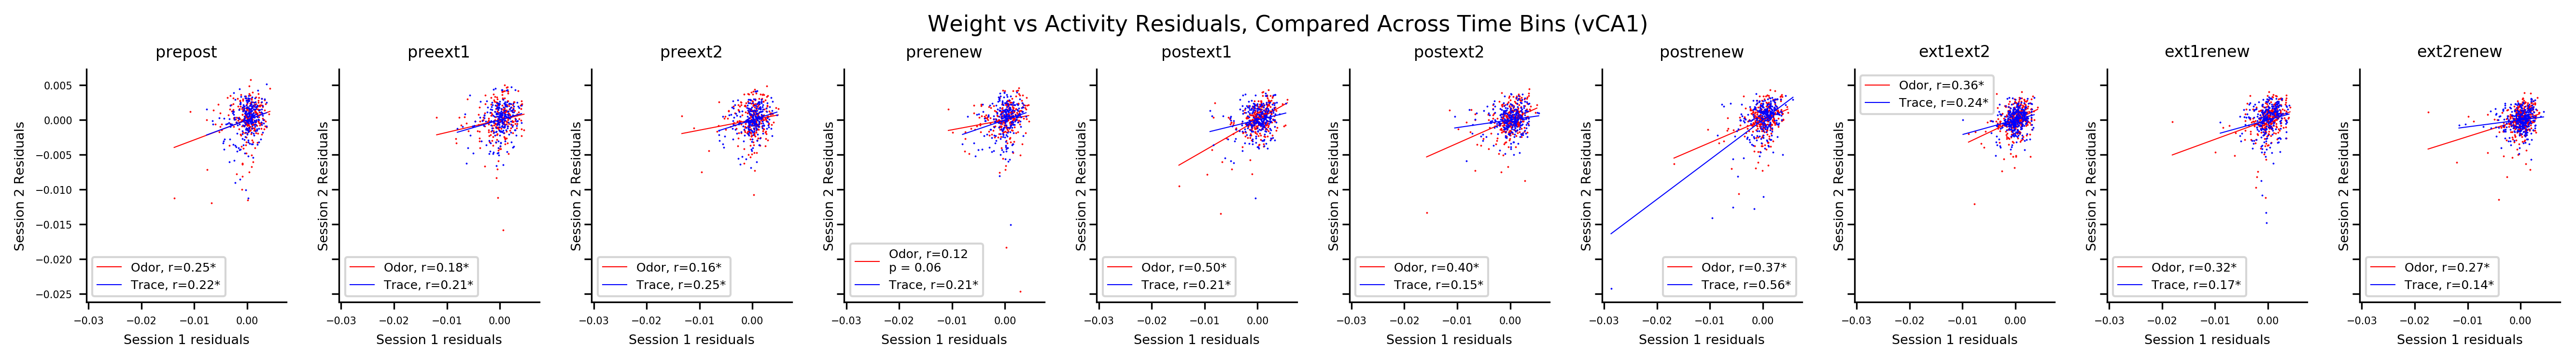

In [72]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for t,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("residuals_tb_%s_%s"%(t,all_comparisons[comp]))
        y = eval("residuals_tb_%s_%s"%(t,all_comparisons[comp+1]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(all_comparisons[comp].split('_')[0],fontsize=8)
        ax[i].set_xlabel("Session 1 residuals",fontsize=6.5)
        ax[i].set_ylabel("Session 2 Residuals",fontsize=6.5)
        
pl.suptitle('Weight vs Activity Residuals, Compared Across Time Bins (vCA1)',fontsize=11, y=1)

fig.tight_layout(pad=3)

### now force intercept to 0 during initial weights vs activity regression

In [73]:
for comp,i in zip(all_comparisons,[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]):
    for t in range(16):
        y = eval("np.array(avg_sum_norm_abs_weights_sess%s_%s[comp.split('_')[0]])"%(i,t))
        x = eval("np.array(avg_events_%s)"%(comp))
        x=x[:,np.newaxis]
        a,_,_,_ = np.linalg.lstsq(x,y)
        exec("residuals_tb_%s_%s=np.copy(x)"%(t,comp))
        for idx,x in enumerate(x):
            yfit = a*x
            exec("residuals_tb_%s_%s[idx] = yfit-y[idx]"%(t,comp))
        exec("residuals_tb_%s_%s_list =[]"%(t,comp))
        for idx in eval("residuals_tb_%s_%s"%(t,comp)):
            exec("residuals_tb_%s_%s_list.append(idx[0])"%(t,comp))

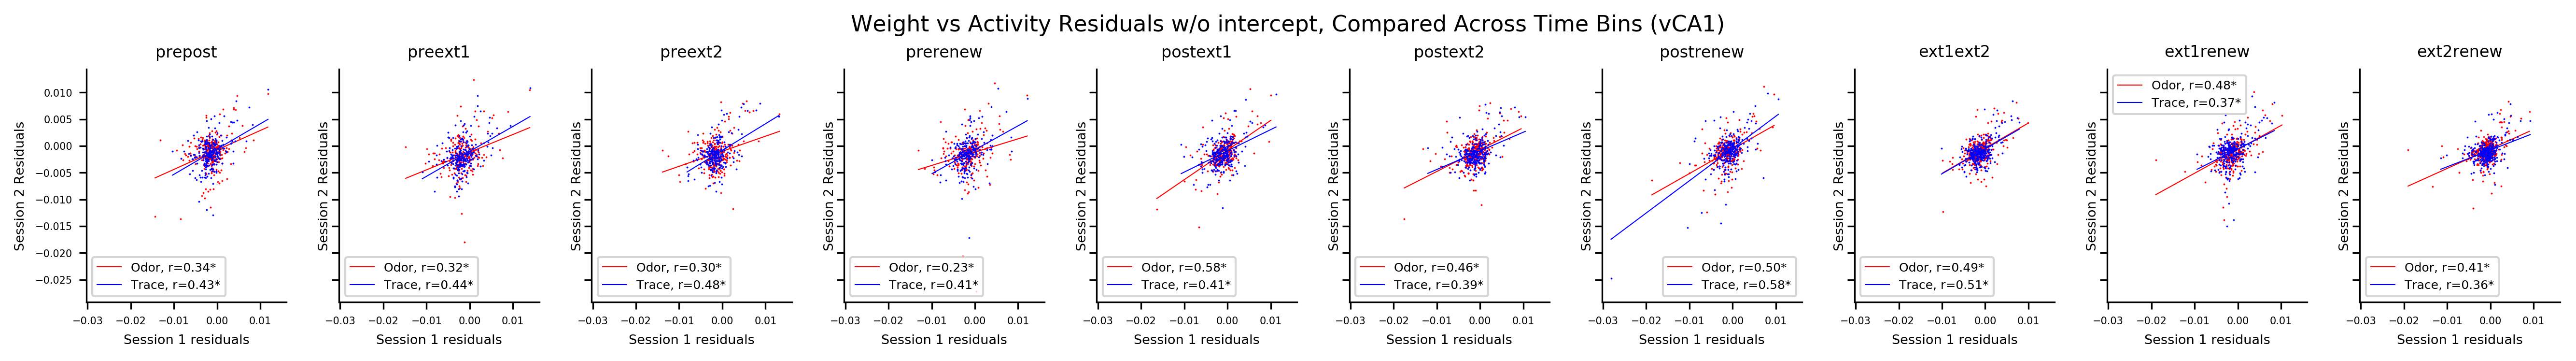

In [74]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for t,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("residuals_tb_%s_%s_list"%(t,all_comparisons[comp]))
        y = eval("residuals_tb_%s_%s_list"%(t,all_comparisons[comp+1]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(all_comparisons[comp].split('_')[0],fontsize=8)
        ax[i].set_xlabel("Session 1 residuals",fontsize=6.5)
        ax[i].set_ylabel("Session 2 Residuals",fontsize=6.5)
pl.suptitle('Weight vs Activity Residuals w/o intercept, Compared Across Time Bins (vCA1)',fontsize=11, y=1)

fig.tight_layout(pad=3)

### and now use residuals of log10 transformed activity/weight values

In [75]:
for comp,i in zip(all_comparisons,[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]):
    for t in range(16):
        y = eval("avg_sum_norm_abs_weights_sess%s_%s_log10[comp.split('_')[0]]"%(i,t))
        x = eval("avg_events_%s_log10"%(comp))
        exec("residuals_tb_%s_%s_log10,m_tb_%s_%s_log10,b_tb_%s_%s_log10,r_tb_%s_%s_log10,pvalue_tb_%s_%s_log10,\
              stderr_tb_%s_%s_log10 = linregress_residuals(x,y)"%(t,comp,t,comp,t,comp,t,comp,t,comp,t,comp))

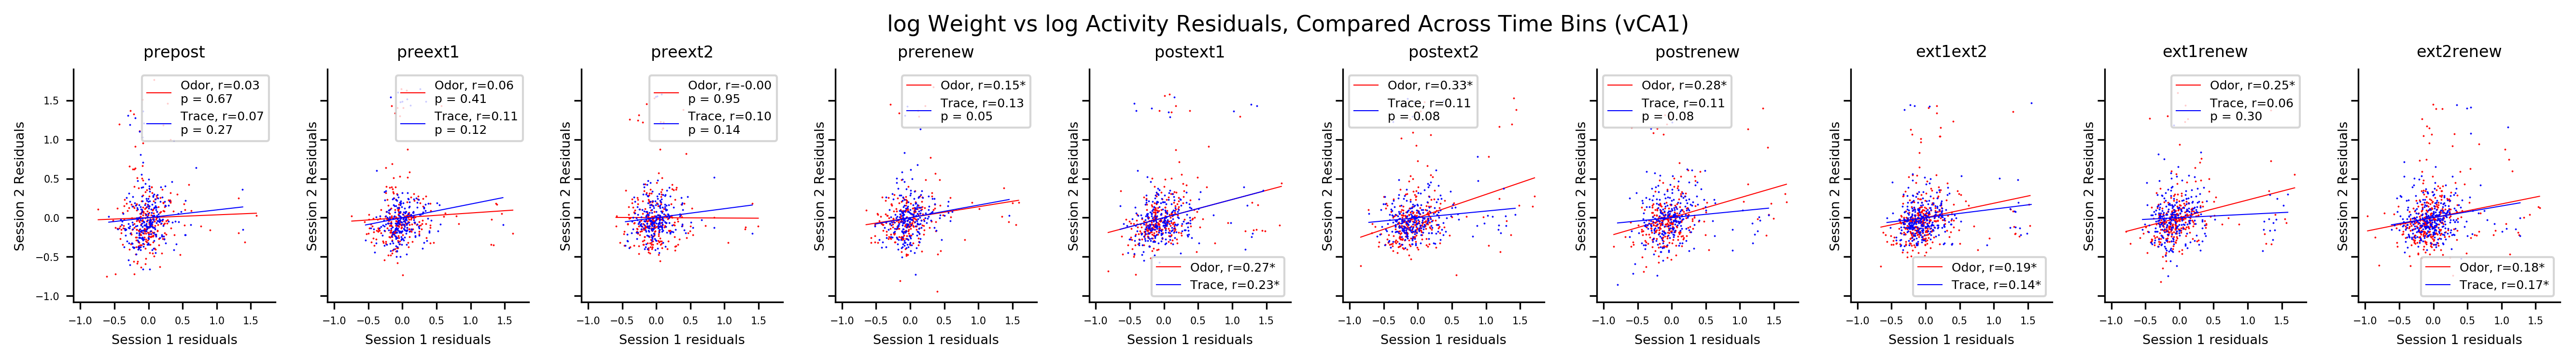

In [76]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for t,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("residuals_tb_%s_%s_log10"%(t,all_comparisons[comp]))
        y = eval("residuals_tb_%s_%s_log10"%(t,all_comparisons[comp+1]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(all_comparisons[comp].split('_')[0],fontsize=8)
        ax[i].set_xlabel("Session 1 residuals",fontsize=6.5)
        ax[i].set_ylabel("Session 2 Residuals",fontsize=6.5)
pl.suptitle('log Weight vs log Activity Residuals, Compared Across Time Bins (vCA1)',fontsize=11, y=1)

fig.tight_layout(pad=3)

### and now use residuals of log10 transformed activity/weight values where 0 weighted cells have been excluded

In [77]:
#from activity list of cells, extract 0 weighted cells that occur in either of the sessions we want to compare
#(we previously extracted cells from the weights list, but now wanna do same for activity list of cells)
for t in range(16):
    for comp in all_comparisons:
        exec("avg_events_tb_%s_sess1VSsess2_%s_log10_no0s = []"%(t,comp))
        #exec("avg_events_tb_%s_sess2VSsess1_%s_log10_no0s = []"%(t,comp))
        for x,y,z in zip(eval("avg_sum_norm_abs_weights_sess1_%s[comp.split('_')[0]]"%t),
                       eval("avg_sum_norm_abs_weights_sess2_%s[comp.split('_')[0]]"%t),eval("avg_events_%s"%(comp))):
            if x == 0 or y == 0:
                print ".",
            else:
                exec("avg_events_tb_%s_sess1VSsess2_%s_log10_no0s.append(math.log10(z))"%(t,comp))

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [78]:
for comp in range(0,len(all_comparisons),2):
    for t in range(16):
        y = eval("avg_sum_norm_abs_weights_sess1VSsess2_%s_log10_no0s[all_comparisons[comp].split('_')[0]]"%(t))
        x = eval("avg_events_tb_%s_sess1VSsess2_%s_log10_no0s"%(t,all_comparisons[comp]))
        exec("residuals_tb_%s_sess1VSsess2_%s_log10_no0s,m_tb_%s_sess1VSsess2_%s_log10_no0s,b_tb_%s_sess1VSsess2_%s_log10_no0s,\
        r_tb_%s_sess1VSsess2_%s_log10_no0s,pvalue_tb_%s_sess1VSsess2_%s_log10_no0s,\
        stderr_tb_%s_sess1VSsess2_%s_log10_no0s = linregress_residuals(x,y)"%(t,all_comparisons[comp],t,all_comparisons[comp],t,
                                all_comparisons[comp],t,all_comparisons[comp],t,all_comparisons[comp],t,all_comparisons[comp]))

In [79]:
for comp in range(0,len(all_comparisons),2):
    for t in range(16):
        y = eval("avg_sum_norm_abs_weights_sess2VSsess1_%s_log10_no0s[all_comparisons[comp+1].split('_')[0]]"%(t))
        x = eval("avg_events_tb_%s_sess1VSsess2_%s_log10_no0s"%(t,all_comparisons[comp+1]))
        exec("residuals_tb_%s_sess1VSsess2_%s_log10_no0s,m_tb_%s_sess1VSsess2_%s_log10_no0s,b_tb_%s_sess1VSsess2_%s_log10_no0s,\
        r_tb_%s_sess1VSsess2_%s_log10_no0s,pvalue_tb_%s_sess1VSsess2_%s_log10_no0s,\
        stderr_tb_%s_sess1VSsess2_%s_log10_no0s = linregress_residuals(x,y)"%(t,all_comparisons[comp+1],t,all_comparisons[comp+1],t,
                                all_comparisons[comp+1],t,all_comparisons[comp+1],t,all_comparisons[comp+1],t,all_comparisons[comp+1]))

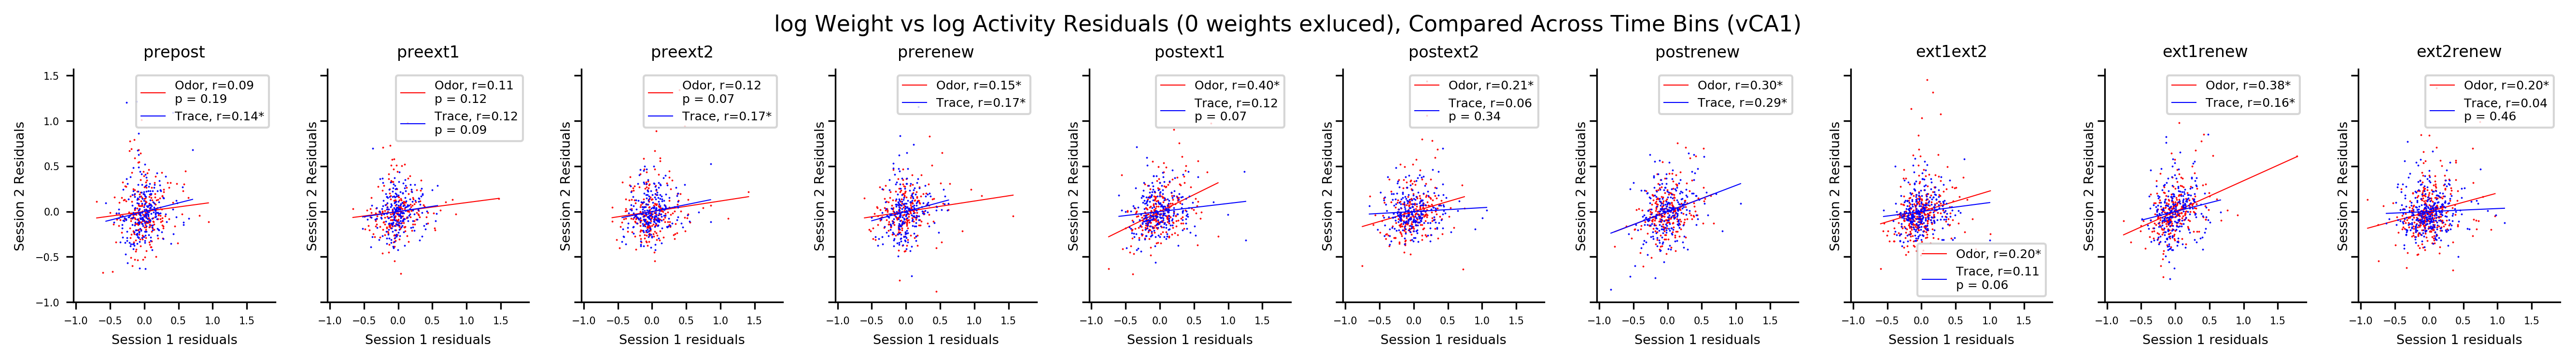

In [80]:
fig, ax = pl.subplots(1,len(all_comparisons)/2, figsize=(18, 2.5),sharex=True,sharey=True)
i=-1

for comp in range(0,len(all_comparisons),2):
    i=i+1
    for t,lc,q,d in zip(('6','8'),('r','b'),('ro','bo'),('Odor','Trace')):
        x = eval("residuals_tb_%s_sess1VSsess2_%s_log10_no0s"%(t,all_comparisons[comp]))
        y = eval("residuals_tb_%s_sess1VSsess2_%s_log10_no0s"%(t,all_comparisons[comp+1]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,markersize=.8,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(all_comparisons[comp].split('_')[0],fontsize=8)
        ax[i].set_xlabel("Session 1 residuals",fontsize=6.5)
        ax[i].set_ylabel("Session 2 Residuals",fontsize=6.5)
pl.suptitle('log Weight vs log Activity Residuals (0 weights exluced), Compared Across Time Bins (vCA1)',fontsize=11, y=1)

fig.tight_layout(pad=3)

Odor p= 0.188936437867 r^2= 0.00765820816748 y = 0.101720097019 x + -4.50885923888e-16
Trace p= 0.0316526424126 r^2= 0.019747064338 y = 0.190125143093 x + 5.28257550435e-16
Odor p= 2.32890778222e-06 r^2= 0.0922221368557 y = 0.288844011442 x + -3.26329410477e-17
Trace p= 5.5017383124e-06 r^2= 0.0826233980653 y = 0.287819673109 x + 1.86961737746e-16


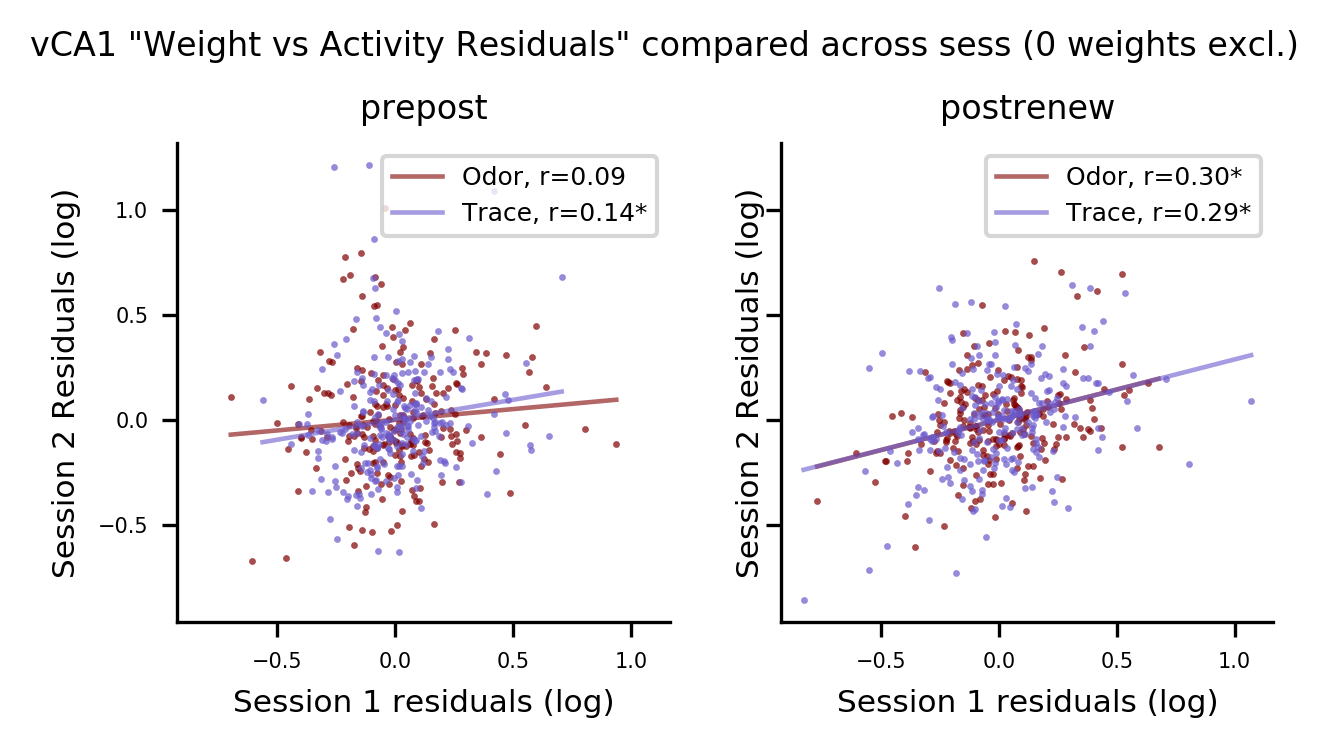

In [14]:
fig, ax = pl.subplots(1,2, figsize=(4.5, 2.5),sharex=True,sharey=True)
i=-1
compare=[['prepost_patterns_pre','prepost_patterns_post'],['postrenew_patterns_post','postrenew_patterns_renew']]
for comp in compare:
    i=i+1
    for t,lc,q,d in zip(('6','8'),('maroon','slateblue'),('o','o'),('Odor','Trace')):
        x = eval("residuals_tb_%s_sess1VSsess2_%s_log10_no0s"%(t,comp[0]))
        y = eval("residuals_tb_%s_sess1VSsess2_%s_log10_no0s"%(t,comp[1]))
        slope, intercept, r_value, p_value, std_err = sstats.linregress(x,y)
        line = slope*(np.unique(x))+intercept
        r2 = r_value*r_value
        if p_value < 0.05:
            lbl = '*'
        else:
            lbl = ''
        print d,'p=',p_value,'r^2=',r_value*r_value,'y =',slope,"x +",intercept
            #lbl = '\np = {:.2f}'.format(p_value)
        ax[i].plot(x,y,q,c=lc,markersize=1.5,alpha=0.7,mew=.1,scalex=False,scaley=False)
        ax[i].plot(np.unique(x), line, '%s'%lc, label='{}, r={:.2f}'.format(d,r_value)+lbl,linewidth=1.1,alpha=.6)
        ax[i].legend(loc='best',prop={'size': 6})
        ax[i].set_title(comp[0].split('_')[0],fontsize=8)
        ax[i].set_xlabel("Session 1 residuals (log)",fontsize=7.5)
        ax[i].set_ylabel("Session 2 Residuals (log)",fontsize=7.5)
        #ax[i].text(0.77,0.95,('r={:.2f}'.format((r_value))+lbl),transform=ax[i].transAxes,fontsize=7,verticalalignment='top',
        #                bbox=dict(facecolor='none',edgecolor='black',boxstyle='round',linewidth=.5,pad=0.5))
pl.suptitle('vCA1 "Weight vs Activity Residuals" compared across sess (0 weights excl.)',fontsize=8, y=1)

fig.tight_layout(pad=3)
fig.savefig("../final-ish figures//%s_weights_vs_residuals.pdf"%NOTEBOOK_NAME)

In [81]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'collections'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'math'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
